In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
#jtplot.style(theme="chesterish")
pd.options.display.max_rows = 100

## Data structuring

#### Importing data.csv

In [2]:
root_dir = os.path.dirname(os.getcwd())
data_clean = pd.read_csv("{}/data/data_E1_100def.csv".format(root_dir))
data_clean.head()

,subject_id,rt,stimulus,trial_type,time_elapsed,gender,age,language,country,sampling,turkcode,nb_of_run,responses,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,NaN,instruction,image-button-response,57391,male,52,English,United States of America,Right,R568953627240gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,instruction,causal-graph1,74607,male,52,English,United States of America,Right,R568953627240gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,instruction,causal-graph1,134847,male,52,English,United States of America,Right,R568953627240gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,instruction,causal-graph1,176598,male,52,English,United States of America,Right,R568953627240gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,instruction,causal-graph1,210198,male,52,English,United States of America,Right,R568953627240gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_clean

,subject_id,rt,stimulus,trial_type,time_elapsed,gender,age,language,country,sampling,turkcode,nb_of_run,responses,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,NaN,instruction,image-button-response,57391,male,52,English,United States of America,Right,R568953627240gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,instruction,causal-graph1,74607,male,52,English,United States of America,Right,R568953627240gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,instruction,causal-graph1,134847,male,52,English,United States of America,Right,R568953627240gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,instruction,causal-graph1,176598,male,52,English,United States of America,Right,R568953627240gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,instruction,causal-graph1,210198,male,52,English,United States of America,Right,R568953627240gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,30,10408.0,chain_RM,causal-graph1,1348836,male,30,English,United States of America,Right,R567961657730gxrw,1.0,NaN,Chain,Medium,NaN,NaN,NaN,node5
1394,30,16460.0,branch_RBME1,causal-graph1,1370850,male,30,English,United States of America,Right,R567961657730gxrw,1.0,NaN,AND_Gate,Medium,Event,Bottom,Short,node5
1395,30,17908.0,branch_RTME3,causal-graph1,1393139,male,30,English,United States of America,Right,R567961657730gxrw,1.0,NaN,AND_Gate,Medium,Event,Top,Long,node5
1396,30,NaN,instruction,image-button-response,1401757,male,30,English,United States of America,Right,R567961657730gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for idx,item in enumerate(data_clean['stimulus']):
    if item == 'comment':
        print(data_clean['responses'][idx])

{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":"Fun!"}
{"Q0":""}
{"Q0":"The study was properly structured.Thanks for making me a part of it."}
{"Q0":""}
{"Q0":"none"}
{"Q0":"No technical troubles "}
{"Q0":""}
{"Q0":""}
{"Q0":"no comments"}
{"Q0":""}
{"Q0":"That was interesting."}
{"Q0":"I was a little confused by the instructions. I'm not sure if that was the point or not though. I was just not sure if the activation would technically be caused by the one directly before it or the first one. Or if the first one that started the whole sequence was really responsible. I switched it up in the middle of the task but I'm still not sure I did it right. "}
{"Q0":""}
{"Q0":"I enjoyed participating, as I feel like I actually learned something. Moreover, the task itself was interesting. Thank you for the experience, and good luck in your research."}
{"Q0":"Thank you very much for this HIT, and best of luck with your research"}
{"Q0":"good"}
{"Q0":"I hope that I did the task co

#### Demographical data only

In [5]:
data_demog = data_clean[["subject_id","gender","age","language","country","turkcode"]]
data_demog = data_demog.drop_duplicates()
data_demog

,subject_id,gender,age,language,country,turkcode
0,1,male,52,English,United States of America,R568953627240gxrw
73,2,male,34,English,United States of America,R563944617690gxrw
106,3,male,27,English,United States of America,R564820277880gxrw
163,4,male,33,english,United States of America,R568786647360gxrw
188,5,male,30,English,United States of America,R569724617580gxrw
237,6,female,32,English,United States of America,R566715267520gxrw
262,7,male,40,English,United States of America,R568289647350gxrw
367,8,female,45,english,United States of America,R567550297450gxrw
448,9,female,25,English,United States of America,R565953577950gxrw
481,10,male,34,English,United States of America,R566689907740gxrw


In [6]:
data_demog['language'].value_counts()

English     22
english      5
English      1
Italian      1
marathi      1
Name: language, dtype: int64

#### Target stimuli only (instructions deleted)

In [7]:
data = data_clean[["subject_id","rt","stimulus","trial_type","sampling","nb_of_run","stim_type","length","state_OR_event",
                   "branch_first","time_interval","node_selected"]]
data = data[data["stimulus"] != "instruction"].drop(['trial_type'],axis=1)
data.reset_index(drop=True,inplace=True)

data.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,24065.440,branch_RTLE3,Right,3.0,AND_Gate,Long,Event,Top,Long,node14
1,1,8017.890,chain_RM,Right,3.0,Chain,Medium,NaN,NaN,NaN,node5
2,1,12390.790,branch_RTLE1,Right,1.0,AND_Gate,Long,Event,Top,Short,node14
3,1,13694.030,branch_RBSE2,Right,1.0,AND_Gate,Short,Event,Bottom,Medium,node7
4,1,15152.995,chain_RL,Right,2.0,Chain,Long,NaN,NaN,NaN,node3


#### Chain only

In [8]:
data_chain = data[data["stim_type"]=="Chain"].drop(["stim_type","state_OR_event","branch_first","time_interval"],axis=1)
data_chain.reset_index(drop=True,inplace=True)
data_chain["stimulus"] = data_chain["stimulus"].astype("category")
data_chain["sampling"] = data_chain["sampling"].astype("category")
data_chain["length"] = data_chain["length"].astype("category")
data_chain.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,node_selected
0,1,8017.890,chain_RM,Right,3.0,Medium,node5
1,1,15152.995,chain_RL,Right,2.0,Long,node3
2,1,8122.540,chain_RS,Right,1.0,Short,node7
3,2,16420.645,chain_LM,Left,1.0,Medium,node5
4,2,10205.150,chain_LS,Left,1.0,Short,node7


#### AND-Gate only

In [9]:
data_AND_Gate = data[data["stim_type"]=="AND_Gate"].drop(["stim_type"],axis=1)
data_AND_Gate.reset_index(drop=True,inplace=True)
data_AND_Gate["stimulus"] = data_AND_Gate["stimulus"].astype("category")
data_AND_Gate["state_OR_event"] = data_AND_Gate["state_OR_event"].astype("category")
data_AND_Gate["sampling"] = data_AND_Gate["sampling"].astype("category")
data_AND_Gate["length"] = data_AND_Gate["length"].astype("category")
data_AND_Gate["branch_first"] = data_AND_Gate["branch_first"].astype("category")
data_AND_Gate["time_interval"] = data_AND_Gate["time_interval"].astype("category")
data_AND_Gate["nb_of_run"] = data_AND_Gate["nb_of_run"].astype("category")
data_AND_Gate.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,state_OR_event,branch_first,time_interval,node_selected
0,1,24065.440,branch_RTLE3,Right,3.0,Long,Event,Top,Long,node14
1,1,12390.790,branch_RTLE1,Right,1.0,Long,Event,Top,Short,node14
2,1,13694.030,branch_RBSE2,Right,1.0,Short,Event,Bottom,Medium,node7
3,1,14381.135,branch_RBME3,Right,1.0,Medium,Event,Bottom,Long,node7
4,1,10532.730,branch_RBSS,Right,1.0,Short,State,Bottom,NaN,node7


## Functions

In [10]:
def chain_node_cat(length,node):
    node =  int(node[-1])
    short = {'INACT':[1,2,3,4,5,6],'ROIMDT':[7],'EFFECT':[8]}
    medium = {'INACT':[1,2,3,4],'ROOT':[5],'INBTW':[6],'IMDT':[7],'EFFECT':[8]}
    long = {'INACT':[1,2],'ROOT':[3],'INBTW':[4,5,6],'IMDT':[7],'EFFECT':[8]}
    category = [cat for cat,nd in (short if length == 'Short' else medium if length == 'Medium' 
                                   else long).items() if node in nd][0]
    
    return category

def branch_node_cat(length,node,first):
    node = int(node[-1]) if len(node) == 5 else int(node[-2:])
    short_top = {'INACT_1st':[1,2,3,4,5,6],'INACT_2nd':[8,9,10,11,12,13],'ROOIMDT_1st':[7],'ROOIMDT_2nd':[14],'EFFECT':[15]}
    short_bot = {'INACT_1st':[8,9,10,11,12,13],'INACT_2nd':[1,2,3,4,5,6],'ROOIMDT_1st':[14],'ROOIMDT_2nd':[7],'EFFECT':[15]}
    medium_top = {'INACT_1st':[1,2,3,4],'INACT_2nd':[8,9,10,11],'ROOT_1st':[5],'ROOT_2nd':[12],'INBTW_1st':[6],'INBTW_2nd':[13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    medium_bot = {'INACT_1st':[8,9,10,11],'INACT_2nd':[1,2,3,4],'ROOT_1st':[12],'ROOT_2nd':[5],'INBTW_1st':[13],'INBTW_2nd':[6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    long_top = {'INACT_1st':[1,2],'INACT_2nd':[8,9],'ROOT_1st':[3],'ROOT_2nd':[10],'INBTW_1st':[4,5,6],'INBTW_2nd':[11,12,13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    long_bot = {'INACT_1st':[8,9],'INACT_2nd':[1,2],'ROOT_1st':[10],'ROOT_2nd':[3],'INBTW_1st':[11,12,13],'INBTW_2nd':[4,5,6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    if length == 'Short':
        category = [cat for cat,nd in (short_top if first == 'Top' else short_bot).items() if node in nd][0]
    elif length == 'Medium':
        category = [cat for cat,nd in (medium_top if first == 'Top' else medium_bot).items() if node in nd][0]
    elif length == 'Long':
        category = [cat for cat,nd in (long_top if first == 'Top' else long_bot).items() if node in nd][0]
    
    return category

class AndGate(object):

    def __init__(self,length=None):
        if length == "short":
            data = data_AND_Gate[data_AND_Gate["length"]=="Short"]
        elif length == "medium":
            data = data_AND_Gate[data_AND_Gate["length"]=="Medium"]
        elif length == "long":
            data = data_AND_Gate[data_AND_Gate["length"]=="Long"]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(15)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'short':
            cats = ['INACT_1st','INACT_2nd','ROOIMDT_1st','ROOIMDT_2nd','EFFECT']
        else:
            cats = ['INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None,delay=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == "top":
            self.df = self.df[self.df["branch_first"]=="Top"]
        elif level == "bottom":
            self.df = self.df[self.df["branch_first"]=="Bottom"]
        if delay == "short":
            self.df = self.df[self.df["time_interval"]=="Short"]
        elif delay == "medium":
            self.df = self.df[self.df["time_interval"]=="Medium"]
        elif delay == "long":
            self.df = self.df[self.df["time_interval"]=="Long"]
        elif delay == False:
            self.df = self.df[self.df["state_OR_event"]=="State"]
        elif delay == True:
            self.df = self.df[self.df["state_OR_event"]=="Event"]
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(15)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        length = self.df['length'].cat.remove_unused_categories().cat.categories[0]
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'Short':
            cats = ['INACT_1st','INACT_2nd','ROOIMDT_1st','ROOIMDT_2nd','EFFECT']
        else:
            cats = ['INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
class Chain(object):
    def __init__(self,length=None):
        if length == "short":
            data = data_chain[data_chain["length"]=="Short"]
        elif length == "medium":
            data = data_chain[data_chain["length"]=="Medium"]
        elif length == "long":
            data = data_chain[data_chain["length"]=="Long"]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(8)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'short':
            cats = ['INACT','ROIMDT','EFFECT']
        else:
            cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
            
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(8)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        length = self.df['length'].cat.remove_unused_categories().cat.categories[0]
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'Short':
            cats = ['INACT','ROIMDT','EFFECT']
        else:
            cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
def graph(list_of_data,title,x_axis='node_category'):
    fig = plt.figure(figsize=(6.6*len(list_of_data),5))
    a = str(len(list_of_data))
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.set_ylim([0,110])
        axis.set_ylabel("Percentage of responses")
        axis.label_outer()
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_title(title[i])
        if x_axis == 'node_selected':
            axis.set_xlabel("Detectors",labelpad=20)
            x.node_select.plot.bar(ax=axis)  
        elif x_axis == 'node_category':
            axis.set_xlabel("Location of the cause",labelpad=20)
            x.node_category.plot.bar(ax=axis)
            
def graph2(list_of_data,x_axis='node_category'):
    fig = plt.figure(figsize=(9,4))
    plt.rcParams['axes.grid'] = False
    #fig.suptitle("Experiment 1", fontweight="bold",y=1.05)
    a = str(len(list_of_data))
    titles = ['Short AND-Gate','Medium AND-Gate','Long AND-Gate']
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_ylim([0,100])
        axis.set_ylabel("Number of responses (%)")
        axis.set_title(titles[i])
        axis.label_outer()
        if i == 0:
            categories = ['R1,I1','R2,I2','other']
            state = [x[0].node_category.ROOIMDT_1st,x[0].node_category.ROOIMDT_2nd,
                     x[0].node_category.INACT_1st+x[0].node_category.INACT_2nd+x[0].node_category.EFFECT,]
            event = [x[1].node_category.ROOIMDT_1st,x[1].node_category.ROOIMDT_2nd,
                     x[1].node_category.INACT_1st+x[1].node_category.INACT_2nd+x[1].node_category.EFFECT,]
        else:
            categories = ['R1','I1','R2','I2','other']
            state = [x[0].node_category.ROOT_1st,x[0].node_category.IMDT_1st,x[0].node_category.ROOT_2nd,
                     x[0].node_category.IMDT_2nd,x[0].node_category.INACT_1st+x[0].node_category.INACT_2nd+
                     x[0].node_category.INBTW_1st+x[0].node_category.INBTW_2nd+x[0].node_category.EFFECT]
            event = [x[1].node_category.ROOT_1st,x[1].node_category.IMDT_1st,x[1].node_category.ROOT_2nd,
                     x[1].node_category.IMDT_2nd,x[1].node_category.INACT_1st+x[1].node_category.INACT_2nd+
                     x[1].node_category.INBTW_1st+x[1].node_category.INBTW_2nd+x[1].node_category.EFFECT]
        df = pd.DataFrame({'state':state,'event':event}, index=categories)
        if i != 1:
            legend = False
        else:
            legend = True
        df.plot.bar(ax=axis,legend=legend,rot=0)
        

In [11]:
data_chain['node_category'] = data_chain.apply(lambda x: chain_node_cat(x['length'],x['node_selected']),axis=1)
data_chain['node_category'] = data_chain['node_category'].astype('category')
data_AND_Gate['node_category'] = data_AND_Gate.apply(lambda x: branch_node_cat(x['length'],x['node_selected'],
                                                                               x['branch_first']),axis=1)
data_AND_Gate['node_category'] = data_AND_Gate['node_category'].astype('category')

## General comparison

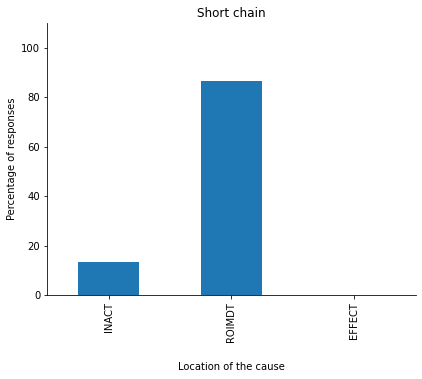

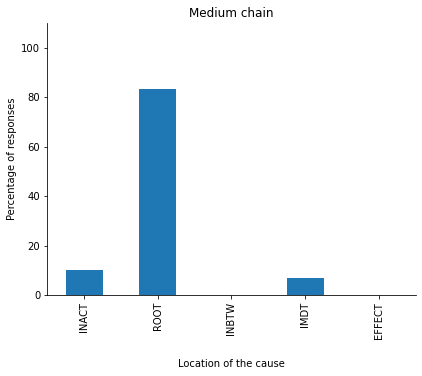

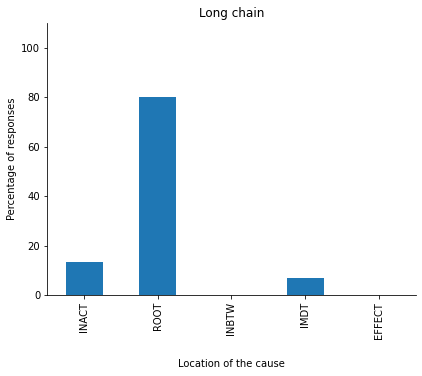

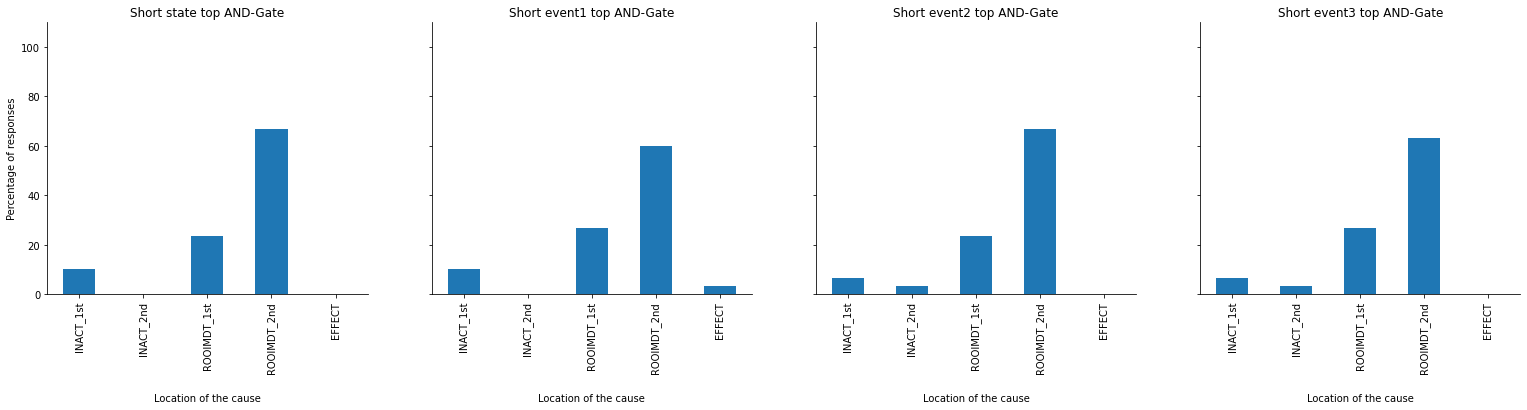

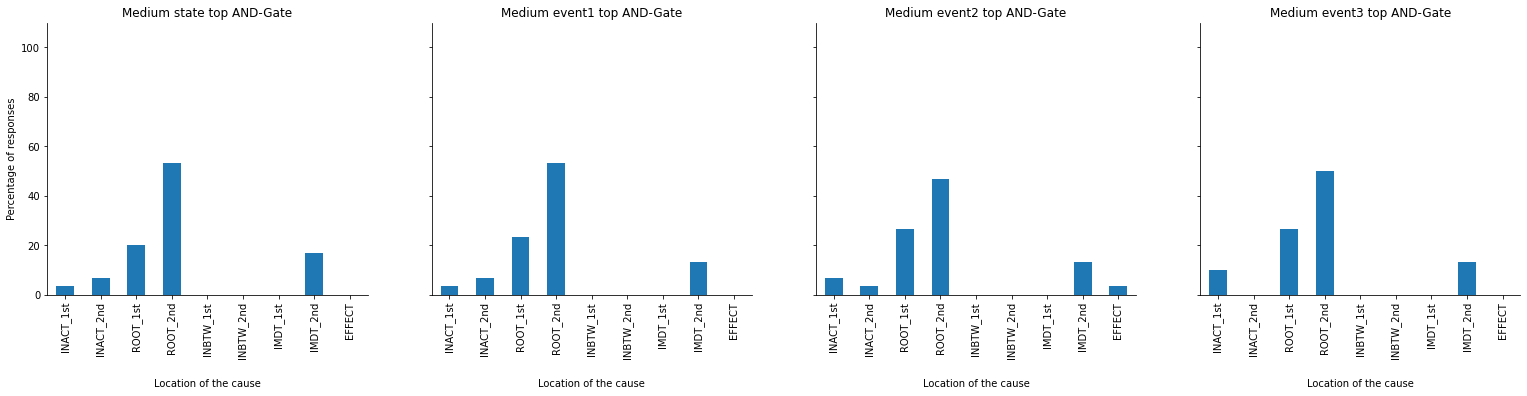

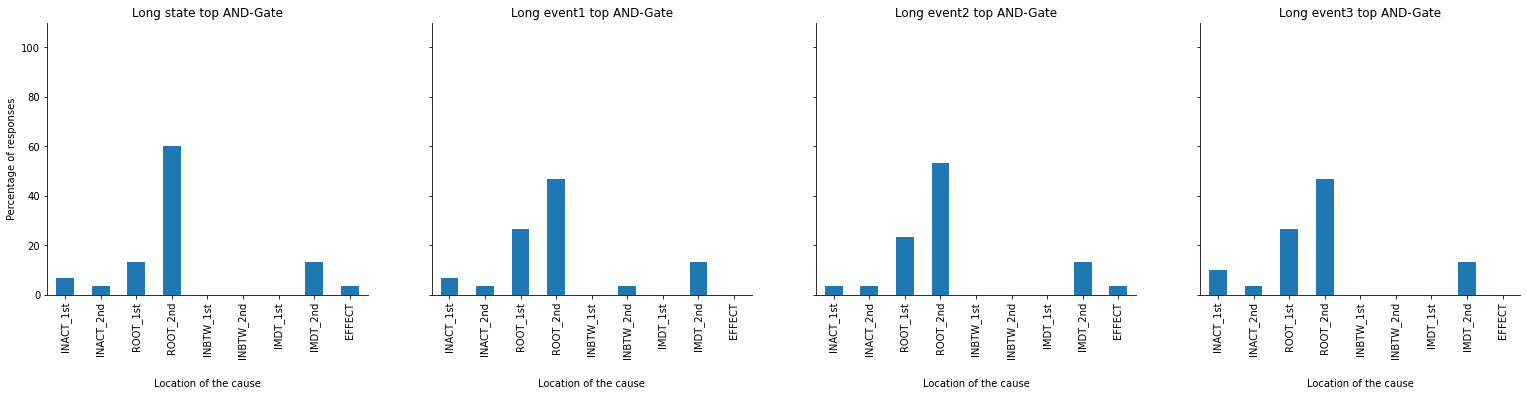

In [12]:
ChainShort = Chain("short").add_filter()
ChainMedium = Chain("medium").add_filter()
ChainLong = Chain("long").add_filter()
ShortState = AndGate("short").add_filter(delay=False)
MediumState = AndGate("medium").add_filter(delay=False)
LongState = AndGate("long").add_filter(delay=False)
ShortEvent1 = AndGate("short").add_filter(delay="short")
ShortEvent2 = AndGate("short").add_filter(delay="medium")
ShortEvent3 = AndGate("short").add_filter(delay="long")
MediumEvent1 = AndGate("medium").add_filter(delay="short")
MediumEvent2  = AndGate("medium").add_filter(delay="medium")
MediumEvent3 = AndGate("medium").add_filter(delay="long")
LongEvent1 = AndGate("long").add_filter(delay="short")
LongEvent2  = AndGate("long").add_filter(delay="medium")
LongEvent3 = AndGate("long").add_filter(delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

In [18]:
ShortState.df.node_category.cat.categories

Index(['EFFECT', 'IMDT_2nd', 'INACT_1st', 'INACT_2nd', 'INBTW_2nd',
       'ROOIMDT_1st', 'ROOIMDT_2nd', 'ROOT_1st', 'ROOT_2nd'],
      dtype='object')

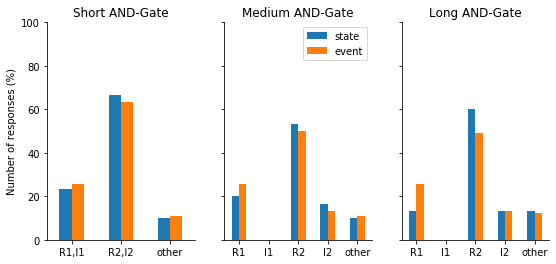

In [13]:
ShortEvent = AndGate("short").add_filter(delay=True)
MediumEvent = AndGate("medium").add_filter(delay=True)
LongEvent = AndGate("long").add_filter(delay=True)
graph2([[ShortState,ShortEvent],[MediumState,MediumEvent],[LongState,LongEvent]])
plt.savefig('results_E1.png',dpi=300,bbox_inches='tight')

## Comparison Right *vs* Left

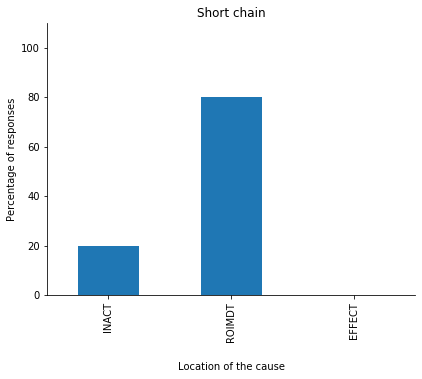

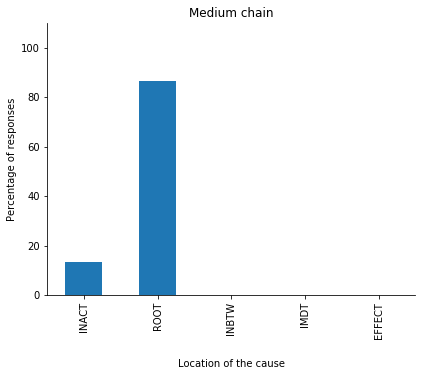

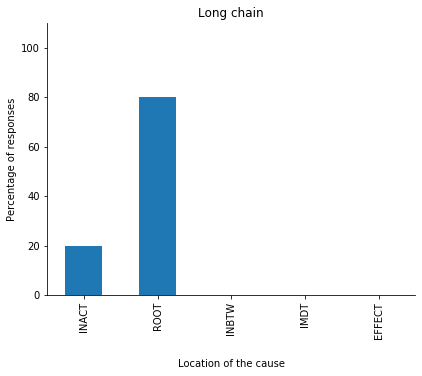

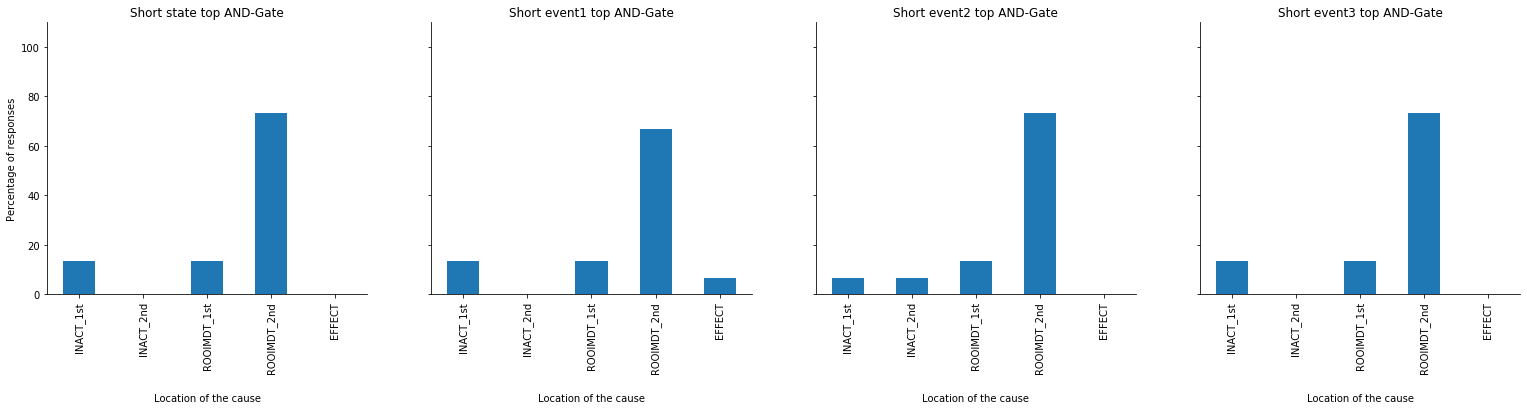

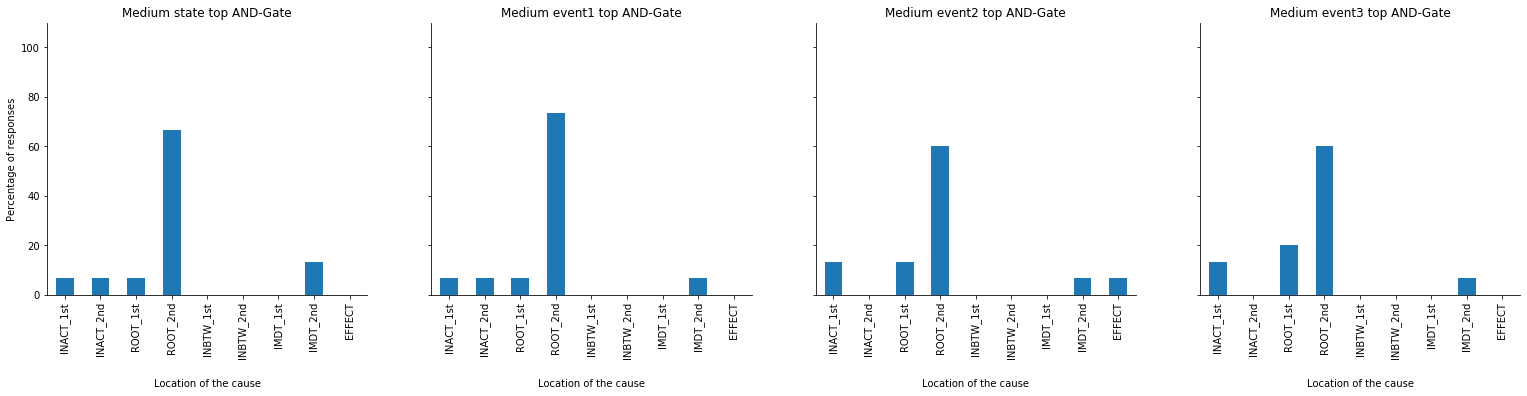

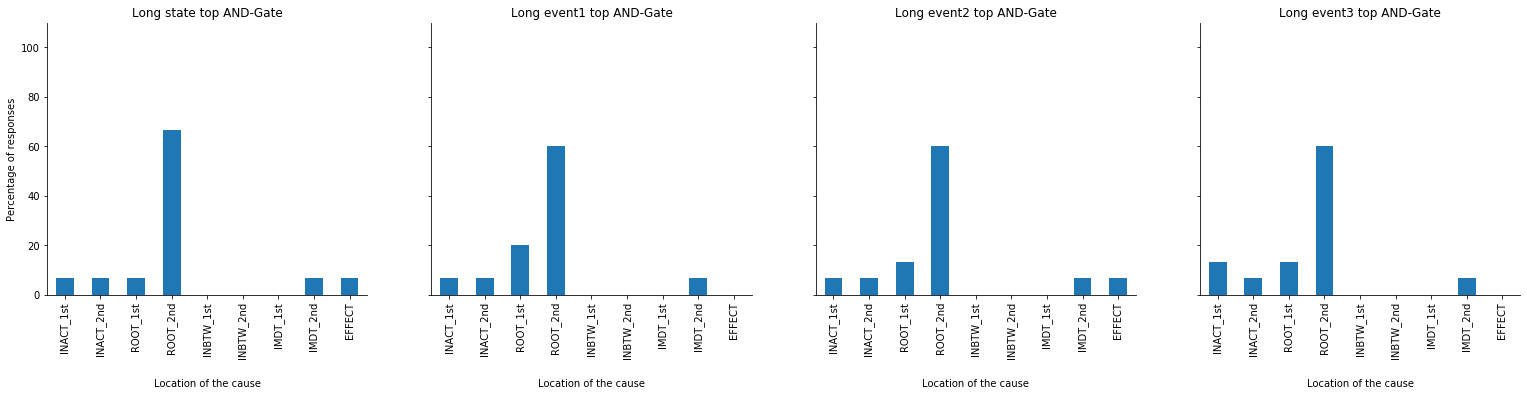

In [14]:
# Same as the general comparison BUT only for the condition 'right' (the effect at the top right)

ChainShort = Chain("short").add_filter(sampling='right')
ChainMedium = Chain("medium").add_filter(sampling='right')
ChainLong = Chain("long").add_filter(sampling='right')
ShortState = AndGate("short").add_filter(sampling='right',delay=False)
MediumState = AndGate("medium").add_filter(sampling='right',delay=False)
LongState = AndGate("long").add_filter(sampling='right',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='right',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='right',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='right',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='right',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='right',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='right',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='right',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='right',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='right',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

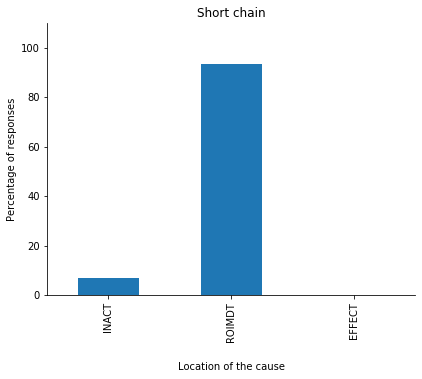

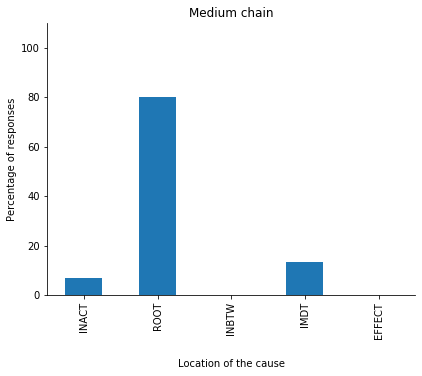

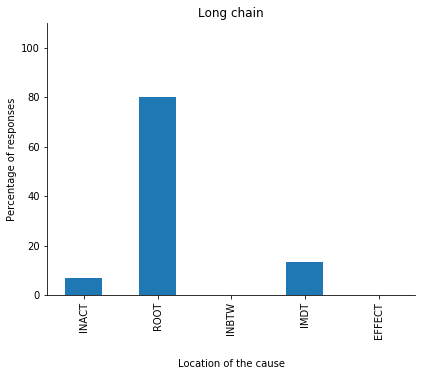

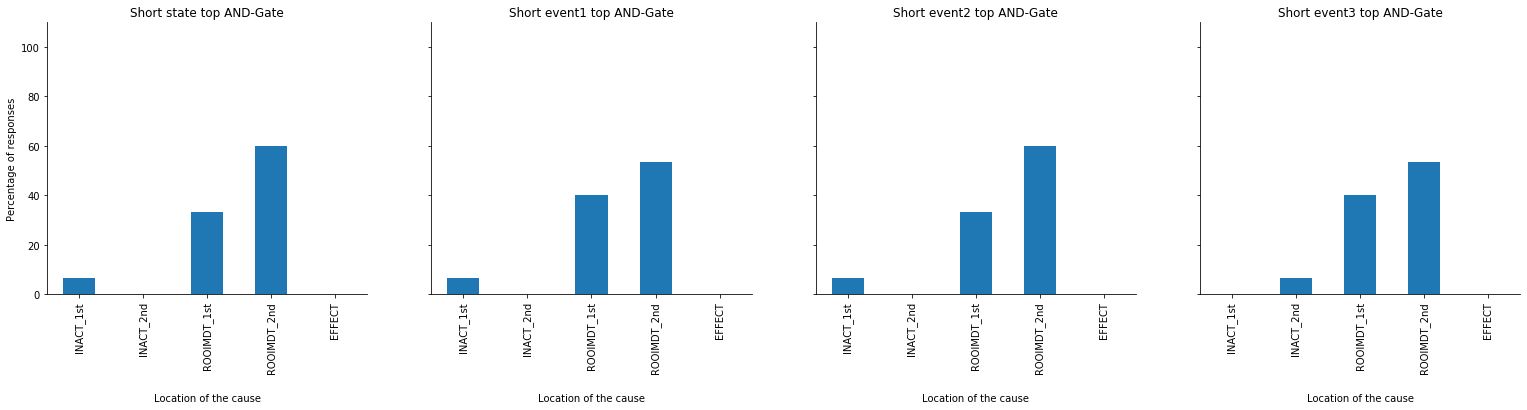

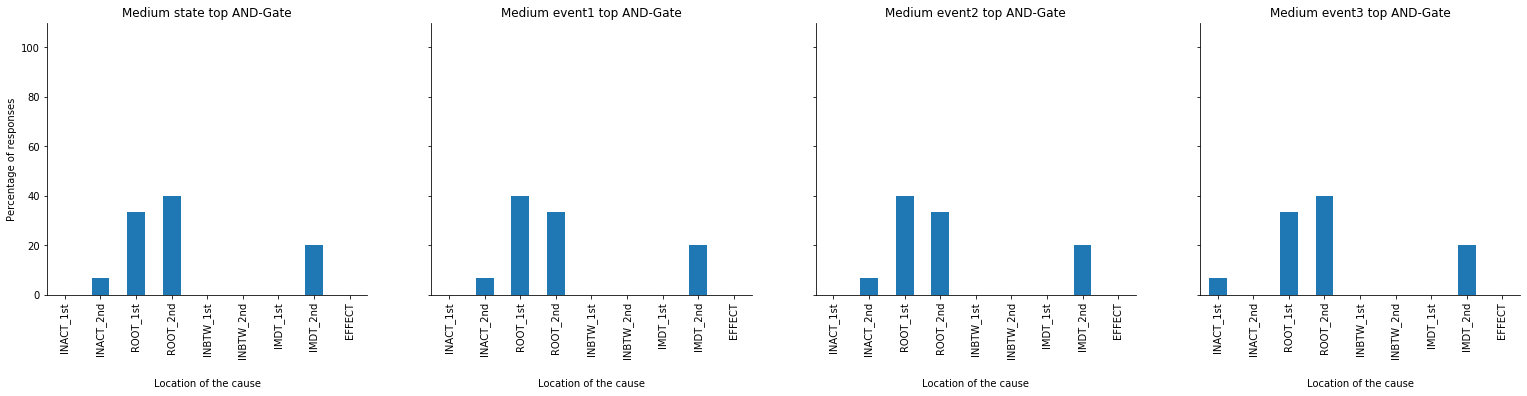

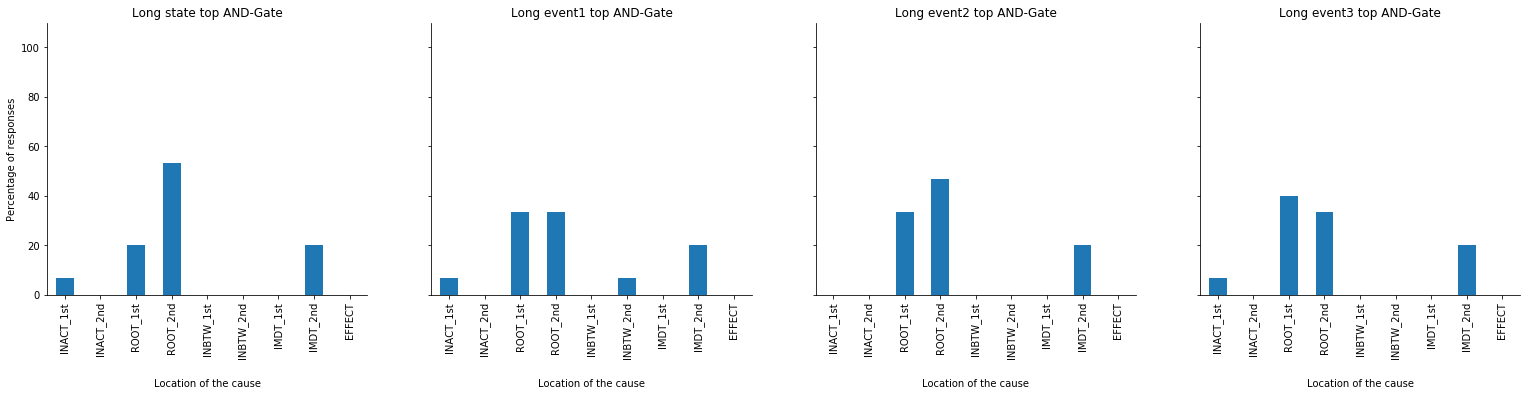

In [15]:
# Same as the general comparison BUT only for the condition 'left' (the effect at the top left)

ChainShort = Chain("short").add_filter(sampling='left')
ChainMedium = Chain("medium").add_filter(sampling='left')
ChainLong = Chain("long").add_filter(sampling='left')
ShortState = AndGate("short").add_filter(sampling='left',delay=False)
MediumState = AndGate("medium").add_filter(sampling='left',delay=False)
LongState = AndGate("long").add_filter(sampling='left',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='left',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='left',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='left',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='left',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='left',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='left',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='left',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='left',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='left',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

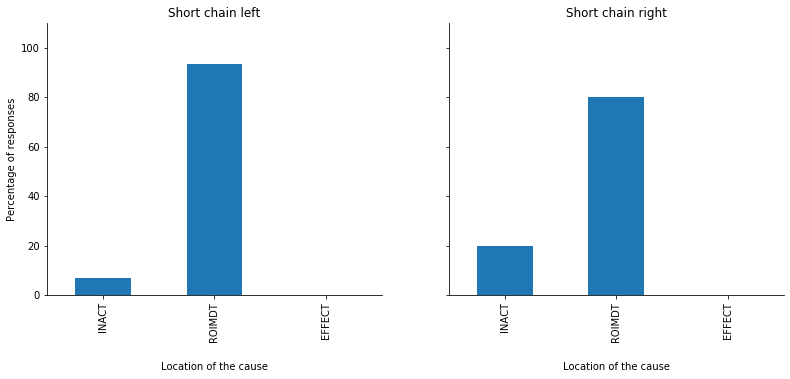

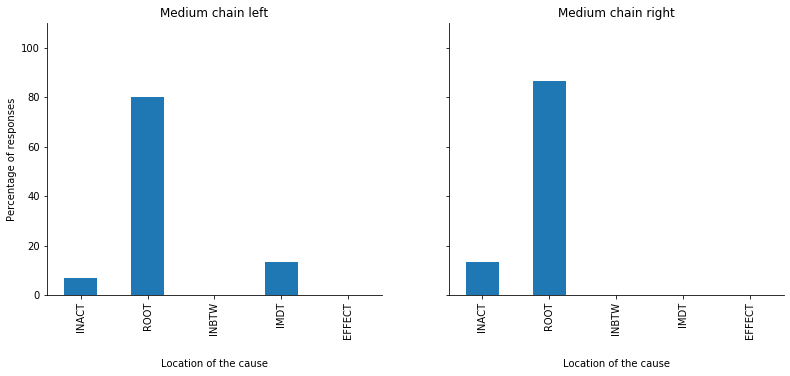

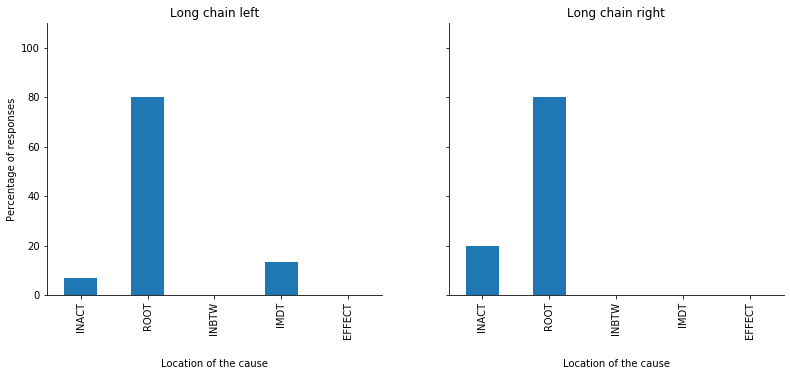

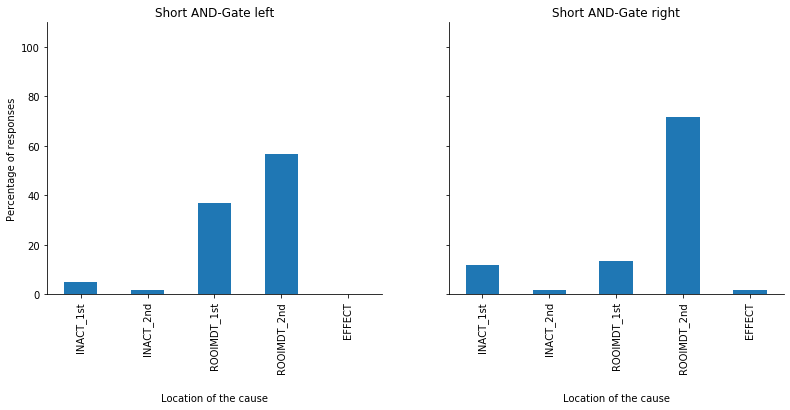

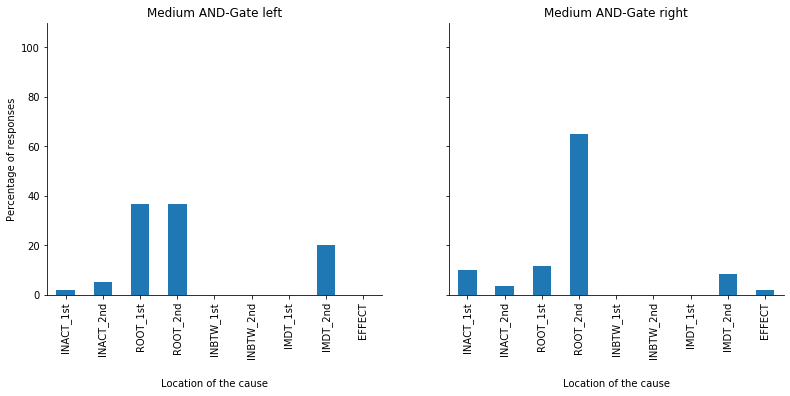

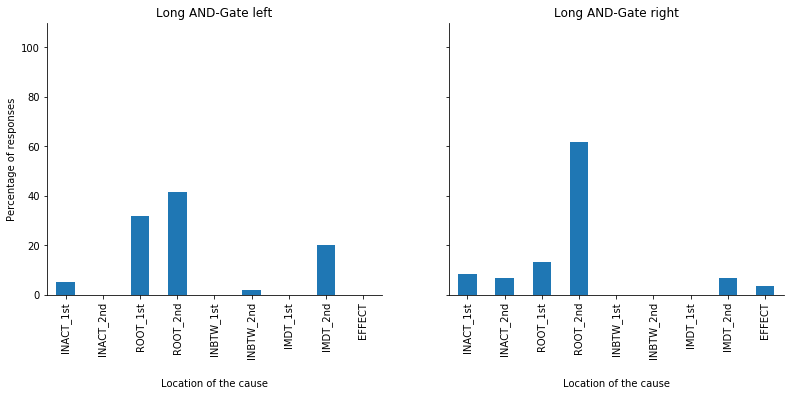

In [16]:
# Broad comparison between right vs left sampling, regardless of the conditions associated to each branch (whether it is 
# state or event --short, medium, long)

ChainShort_R = Chain("short").add_filter(sampling="right")
ChainMedium_R = Chain("medium").add_filter(sampling="right")
ChainLong_R = Chain("long").add_filter(sampling="right")
ChainShort_L = Chain("short").add_filter(sampling="left")
ChainMedium_L = Chain("medium").add_filter(sampling="left")
ChainLong_L = Chain("long").add_filter(sampling="left")
BranchShort_R = AndGate("short").add_filter(sampling="right")
BranchMedium_R = AndGate("medium").add_filter(sampling="right")
BranchLong_R = AndGate("long").add_filter(sampling="right")
BranchShort_L = AndGate("short").add_filter(sampling="left")
BranchMedium_L = AndGate("medium").add_filter(sampling="left")
BranchLong_L = AndGate("long").add_filter(sampling="left")

graph([ChainShort_L,ChainShort_R],["Short chain left","Short chain right"])
graph([ChainMedium_L,ChainMedium_R],["Medium chain left","Medium chain right"])
graph([ChainLong_L,ChainLong_R],["Long chain left","Long chain right"])
graph([BranchShort_L,BranchShort_R],["Short AND-Gate left","Short AND-Gate right"])
graph([BranchMedium_L,BranchMedium_R],["Medium AND-Gate left","Medium AND-Gate right"])
graph([BranchLong_L,BranchLong_R],["Long AND-Gate left","Long AND-Gate right"])

## Comparison Top *vs* Bottom

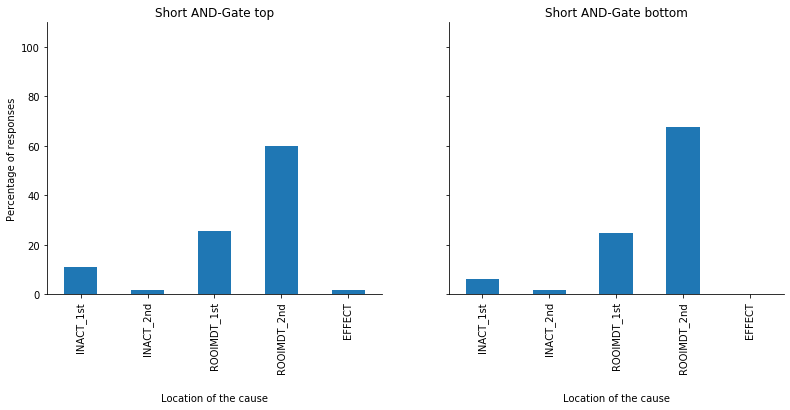

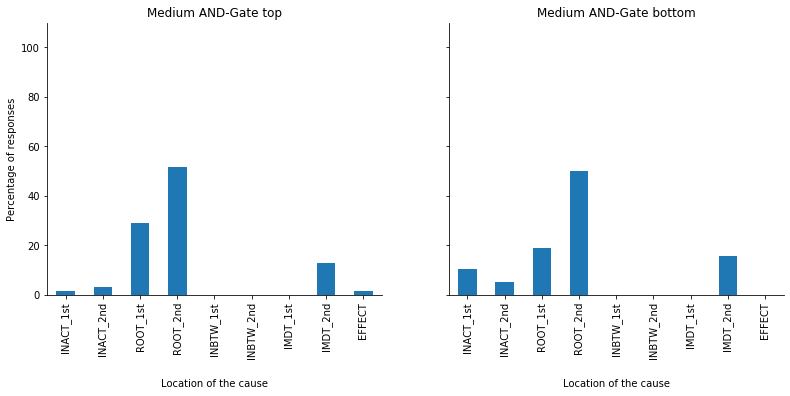

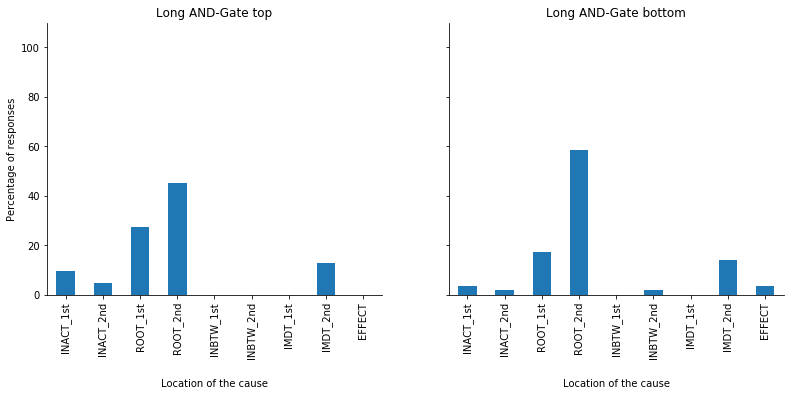

In [17]:
# Broad comparison between Top vs Bottom conditions, regardless of the conditions associated to each branch (whether it is 
# state or event --short, medium, long)

BranchShort_T = AndGate("short").add_filter(level="top")
BranchMedium_T = AndGate("medium").add_filter(level="top")
BranchLong_T = AndGate("long").add_filter(level="top")
BranchShort_B = AndGate("short").add_filter(level="bottom")
BranchMedium_B = AndGate("medium").add_filter(level="bottom")
BranchLong_B = AndGate("long").add_filter(level="bottom")

graph([BranchShort_T,BranchShort_B],["Short AND-Gate top","Short AND-Gate bottom"])
graph([BranchMedium_T,BranchMedium_B],["Medium AND-Gate top","Medium AND-Gate bottom"])
graph([BranchLong_T,BranchLong_B],["Long AND-Gate top","Long AND-Gate bottom"])